In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL #Python Imaging Library
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin=dataset_url, cache_dir=".", untar=True)
#archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
#data_dir = pathlib.Path(archive).with_suffix('.')

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
list(data_dir.glob("*/*.jpg"))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [8]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [9]:
roses = len(list(data_dir.glob("roses/*") ) )
roses

641

In [10]:
flower_img_dict = {
    'roses': list(data_dir.glob("roses/*") ),
    'daisy': list(data_dir.glob("daisy/*") ),
    'dandelion': list(data_dir.glob("dandelion/*") ),
    'sunflowers': list(data_dir.glob("sunflowers/*") ),
    'tulips': list(data_dir.glob("tulips/*") ),
}

In [11]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
num_classes = len(flower_labels_dict)
num_classes

5

In [13]:
flower_img_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [14]:
str(flower_img_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [15]:
img = cv2.imread(str(flower_img_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

In [18]:
for flower_name,images in flower_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [19]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [20]:
X = np.array(X)
y = np.array(y)
len(X)

3670

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [22]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
X_train_scaled[0]

array([[[0.05098039, 0.11372549, 0.17647059],
        [0.05098039, 0.11764706, 0.17254902],
        [0.04705882, 0.10588235, 0.16862745],
        ...,
        [0.01568627, 0.01568627, 0.07058824],
        [0.01568627, 0.01960784, 0.07058824],
        [0.01176471, 0.01960784, 0.0627451 ]],

       [[0.05098039, 0.11372549, 0.17254902],
        [0.04705882, 0.10980392, 0.17254902],
        [0.04705882, 0.10588235, 0.16862745],
        ...,
        [0.        , 0.01176471, 0.06666667],
        [0.00392157, 0.01568627, 0.06666667],
        [0.00392157, 0.01176471, 0.05882353]],

       [[0.05490196, 0.11764706, 0.18039216],
        [0.05490196, 0.11372549, 0.17647059],
        [0.05098039, 0.11372549, 0.17647059],
        ...,
        [0.        , 0.01176471, 0.06666667],
        [0.        , 0.00784314, 0.0627451 ],
        [0.00392157, 0.01568627, 0.05490196]],

       ...,

       [[0.06666667, 0.14509804, 0.18823529],
        [0.07058824, 0.14509804, 0.19607843],
        [0.0745098 , 0

In [24]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='sigmoid'),
])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [25]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 55s 500ms/step - loss: 1.3080 - accuracy: 0.4401
Epoch 2/10
92/92 [==============================] - 44s 480ms/step - loss: 0.9821 - accuracy: 0.6141
Epoch 3/10
92/92 [==============================] - 45s 491ms/step - loss: 0.8216 - accuracy: 0.6795
Epoch 4/10
92/92 [==============================] - 41s 450ms/step - loss: 0.6022 - accuracy: 0.7762
Epoch 5/10
92/92 [==============================] - 47s 516ms/step - loss: 0.3738 - accuracy: 0.8621
Epoch 6/10
92/92 [==============================] - 39s 419ms/step - loss: 0.1840 - accuracy: 0.9421
Epoch 7/10
92/92 [==============================] - 39s 419ms/step - loss: 0.1237 - accuracy: 0.9605
Epoch 8/10
92/92 [==============================] - 39s 428ms/step - loss: 0.0894 - accuracy: 0.9751
Epoch 9/10
92/92 [==============================] - 38s 415ms/step - loss: 0.0378 - accuracy: 0.9905
Epoch 10/10
92/92 [==============================] - 38s 418ms/step - loss: 0.0130 - accura

In [26]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 7s 76ms/step - loss: 2.1759 - accuracy: 0.6580


[2.175870656967163, 0.6580381393432617]

In [27]:
predictions = model.predict(X_test_scaled)
predictions

23/23 [==============================] - 7s 73ms/step


array([[5.4807373e-04, 1.0000000e+00, 1.2982453e-01, 2.4668968e-06,
        3.5386678e-05],
       [9.9922109e-01, 9.0367086e-03, 1.7894384e-04, 1.2527012e-02,
        9.9980879e-01],
       [1.0092733e-04, 7.9839379e-02, 9.9999380e-01, 3.8442417e-04,
        1.1098013e-02],
       ...,
       [7.4697062e-05, 9.9998403e-01, 9.8960626e-01, 1.5055176e-04,
        1.9317200e-02],
       [5.7985172e-02, 5.2030729e-03, 3.9099139e-01, 9.9909943e-01,
        1.7562561e-02],
       [2.8928163e-02, 9.8455465e-01, 9.9610281e-01, 3.5900171e-05,
        4.1794587e-02]], dtype=float32)

In [29]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.14590576, 0.39639565, 0.16604143, 0.14582618, 0.14583097],
      dtype=float32)>

In [30]:
np.argmax(score)

1

In [31]:
y_test[0]

1

In [58]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

In [59]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [60]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[16.113499  , 29.51529   , 14.954942  ],
        [16.59277   , 29.308609  , 15.59277   ],
        [16.45637   , 28.854563  , 15.456369  ],
        ...,
        [18.247694  , 36.453842  , 19.715633  ],
        [18.903856  , 37.43167   , 21.25021   ],
        [19.398193  , 38.239635  , 22.353134  ]],

       [[12.878955  , 26.225319  , 12.1631155 ],
        [13.111286  , 24.943977  , 12.360512  ],
        [12.787798  , 24.005184  , 11.949541  ],
        ...,
        [17.31491   , 35.33397   , 18.333971  ],
        [19.026264  , 37.304855  , 20.304857  ],
        [20.530567  , 39.058388  , 22.036234  ]],

       [[ 9.000347  , 20.028341  ,  8.808304  ],
        [ 8.440411  , 18.449345  ,  8.472526  ],
        [ 7.809187  , 17.349298  ,  7.6021547 ],
        ...,
        [18.333092  , 35.19758   , 19.107887  ],
        [20.411238  , 37.564392  , 21.592041  ],
        [21.729734  , 39.181038  , 23.334076  ]],

       ...,

     

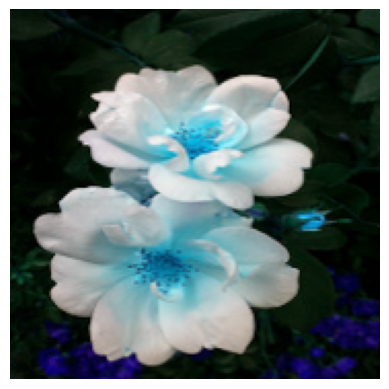

In [61]:
plt.axis('off')
plt.imshow(X[0])

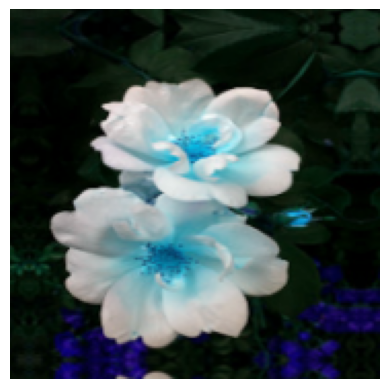

In [62]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [63]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.8),
])

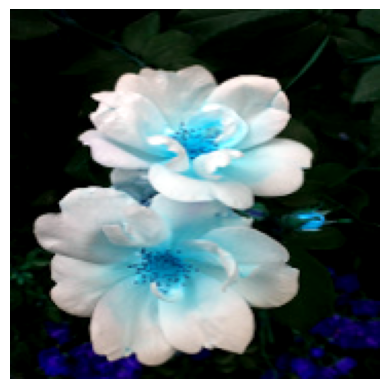

In [64]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [65]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.5),
])

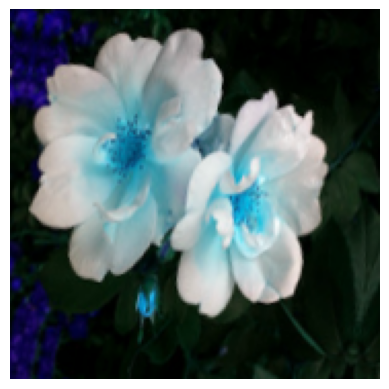

In [66]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [76]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

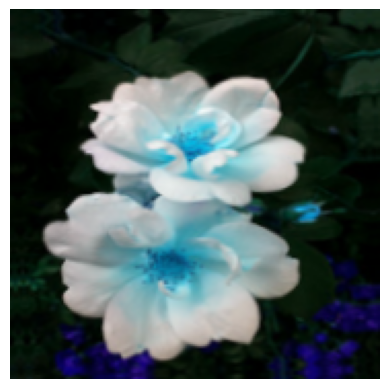

In [77]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [78]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='sigmoid'),
])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [79]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 59s 542ms/step - loss: 1.4844 - accuracy: 0.3478
Epoch 2/10
92/92 [==============================] - 48s 527ms/step - loss: 1.1186 - accuracy: 0.5525
Epoch 3/10
92/92 [==============================] - 51s 555ms/step - loss: 1.0316 - accuracy: 0.5906
Epoch 4/10
92/92 [==============================] - 48s 517ms/step - loss: 0.9735 - accuracy: 0.6114
Epoch 5/10
92/92 [==============================] - 47s 506ms/step - loss: 0.9284 - accuracy: 0.6390
Epoch 6/10
92/92 [==============================] - 49s 529ms/step - loss: 0.8922 - accuracy: 0.6499
Epoch 7/10
92/92 [==============================] - 47s 510ms/step - loss: 0.8525 - accuracy: 0.6785
Epoch 8/10
92/92 [==============================] - 50s 542ms/step - loss: 0.8218 - accuracy: 0.6914
Epoch 9/10
92/92 [==============================] - 55s 603ms/step - loss: 0.8055 - accuracy: 0.6914
Epoch 10/10
92/92 [==============================] - 51s 552ms/step - loss: 0.7832 - accura

In [80]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 8s 106ms/step - loss: 0.8317 - accuracy: 0.6717


[0.8316649794578552, 0.6716621518135071]